# Unit 1: Vectors, Matrices, Inverses, and Determinants

In this unit:
1. Vectors
1. Operations with vectors
1. Dot product
1. Norms
1. Matrices
1. Operations with matrices
1. Special matrices
1. Transpose
1. Inverses 
1. Determinants
1. Gradient vectors


### Dimension (length) of a vector

In [1]:
v1 = [1] #scalar
v2 = [1,2] #in the plane
v3 = [1,2,3] # in space
v4 = [1,2,3,4] #higher diemension
println("Length of v3 = ", length(v3))
length.([v1,v2,v3,v4])

Length of v3 = 3


4-element Array{Int64,1}:
 1
 2
 3
 4

### Linear combintations of vectors

$$\alpha_1 v_1 + \alpha_2 v_2$$

In [2]:
v1 = [1,2,3]
v2 = [4,5,6]
α1 = 2
α2 = -1
α1*v1+α2*v2

3-element Array{Int64,1}:
 -2
 -1
  0

### Dot products

$$
u \cdot v = u^{T} v = \sum_{i=1}^n u_k v_k
$$

In [3]:
using LinearAlgebra
n = length(v1)
n == length(v2) || @error "Vectors must be of same length"
v1'*v2, dot(v1,v2), v1 ⋅ v2, sum([v1[k]*v2[k] for k in 1:n]) #get ⋅ using \cdot +[TAB]

(32, 32, 32, 32)

### Norms

In [4]:
norm(v1),norm(v1,2),sqrt(v1'*v1) 

(3.7416573867739413, 3.7416573867739413, 3.7416573867739413)

In [5]:
norm(-v1)

3.7416573867739413

In [6]:
norm(v1,1),norm(-v1,1) #The L_1 norm

(6.0, 6.0)

### Normalizing a vector

In [7]:
normVect(v) = v1/norm(v1)
vn = normVect(v1)
println("Norm of normed vec: ", norm(vn))
vn

Norm of normed vec: 1.0


3-element Array{Float64,1}:
 0.2672612419124244
 0.5345224838248488
 0.8017837257372732

#### QQQQ - angle between vectors

#### QQQQ - Cauchy-Schwarz, Triangle Inequality

### Matrices

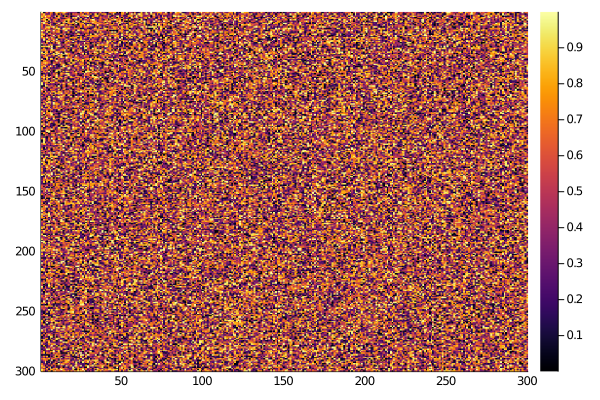

In [8]:
using Plots
heatmap(rand(300,300),yflip = true)

In [9]:
H = [i == j+4 || i == j-2 for i in 1:10, j in 1:10]

10×10 Array{Bool,2}:
 0  0  1  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  0  0
 0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0
 1  0  0  0  0  0  1  0  0  0
 0  1  0  0  0  0  0  1  0  0
 0  0  1  0  0  0  0  0  1  0
 0  0  0  1  0  0  0  0  0  1
 0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0

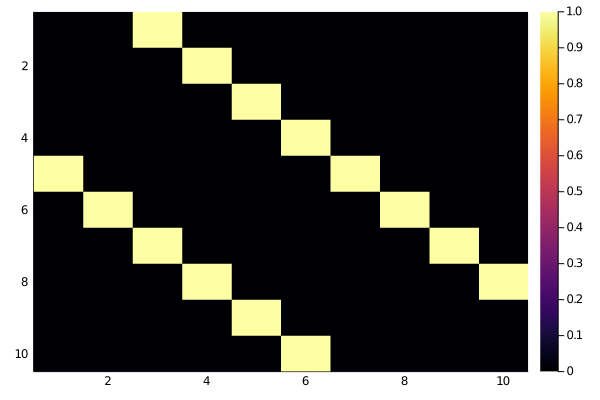

In [10]:
heatmap(H,yflip = true)

In [11]:
A = [1 2; 3 4] 
B = [-2 3; 1 3]
C = [0 1 2; -1 1 0]
display(A);display(B);display(C)

2×2 Array{Int64,2}:
 1  2
 3  4

2×2 Array{Int64,2}:
 -2  3
  1  3

2×3 Array{Int64,2}:
  0  1  2
 -1  1  0

In [12]:
A+B

2×2 Array{Int64,2}:
 -1  5
  4  7

In [13]:
3*A

2×2 Array{Int64,2}:
 3   6
 9  12

In [14]:
2A+B

2×2 Array{Int64,2}:
 0   7
 7  11

In [15]:
A+C

DimensionMismatch: DimensionMismatch("dimensions must match: a has dims (Base.OneTo(2), Base.OneTo(2)), b has dims (Base.OneTo(2), Base.OneTo(3)), mismatch at 2")

In [16]:
A*B

2×2 Array{Int64,2}:
  0   9
 -2  21

In [17]:
B*A

2×2 Array{Int64,2}:
  7   8
 10  14

In [18]:
""" 
My own matrix multiplication function 
"""
function myMatMult(A,B)
    n,m = size(A)
    p,q = size(B)
    if m != q
        @error "Size mismatch"
    end
    C = zeros(n,q)
    for i in 1:n
        for j in 1:q
            C[i,j] = dot(A[i,:],B[:,j])
        end
    end
    C
end

myMatMult

In [19]:
? myMatMult

search: myMatMult



My own matrix multiplication function 


In [20]:
myMatMult(A,B)

2×2 Array{Float64,2}:
  0.0   9.0
 -2.0  21.0

In [24]:
using Random
Random.seed!(0)
A = rand(1000,1000)
@time begin
    for _ in 1:100
        global A = A*rand(1000,1000)
    end
end

  3.881909 seconds (400 allocations: 1.490 GiB, 4.36% gc time)


In [28]:
@time begin
    for _ in 1:5
        global A = myMatMult(A,rand(1000,1000))
    end
end

 32.910580 seconds (10.00 M allocations: 75.772 GiB, 29.80% gc time)


In [29]:
I

UniformScaling{Bool}
true*I

In [33]:
A = [1 2; 3 4] 

2×2 Array{Int64,2}:
 1  2
 3  4

In [34]:
A*I .== A

2×2 BitArray{2}:
 1  1
 1  1

In [35]:
I*A

2×2 Array{Int64,2}:
 1  2
 3  4

### Inverses

$$A^{-1} A = I, 
\qquad
A A^{-1} = I$$

In [36]:
Ai = inv(A)

2×2 Array{Float64,2}:
 -2.0   1.0
  1.5  -0.5

In [37]:
Ai*A

2×2 Array{Float64,2}:
 1.0          0.0
 2.22045e-16  1.0

In [38]:
A*Ai

2×2 Array{Float64,2}:
 1.0          0.0
 8.88178e-16  1.0

$$
(AB)^{-1} = B^{-1}A^{-1}
$$

In [41]:
A = [1 2; 3 4];
B = [5 6; 7 8]
inv(A*B)

2×2 Array{Float64,2}:
  12.5   -5.5
 -10.75   4.75

In [42]:
inv(B)*inv(A)

2×2 Array{Float64,2}:
  12.5   -5.5
 -10.75   4.75

### Determinants

In [1]:
A = [1 2; 3 4]

2×2 Array{Int64,2}:
 1  2
 3  4

In [3]:
using LinearAlgebra
det(A), A[1,1]*A[2,2]-A[1,2]*A[2,1]

(-2.0, -2)

In [4]:
B = [ 1 2 3; 4 5 6]

2×3 Array{Int64,2}:
 1  2  3
 4  5  6

In [5]:
det(B)

DimensionMismatch: DimensionMismatch("matrix is not square: dimensions are (2, 3)")

In [38]:
function myDet(A)
    n, m = size(A)
    n == m || @error "Dimension mismatch"
    if n == 2
        return A[1,1]*A[2,2]-A[1,2]*A[2,1]
    else
        return sum([(-1)^(i+1)*A[1,i]*det(A[2:n,setdiff(1:n,i)])   for i in 1:n])
    end
end

myDet (generic function with 1 method)

In [42]:
A = rand(5,5)

5×5 Array{Float64,2}:
 0.411547  0.856212  0.77529    0.00774377  0.9056
 0.487703  0.361782  0.208092   0.940379    0.456911
 0.262204  0.490879  0.0390169  0.420601    0.626411
 0.207319  0.131707  0.286204   0.456596    0.155493
 0.824443  0.638328  0.290695   0.832459    0.168462

In [43]:
det(A)

-0.011605359687676266

In [44]:
myDet(A)

-0.011605359687676262

In [45]:
det(inv(A)),1/det(A)

(-86.16708373648252, -86.16708373648257)

$$|AB| =|A| |B|$$

In [55]:
A = [1 0;
    1 0]

2×2 Array{Int64,2}:
 1  0
 1  0

In [56]:
det(A)

0.0

In [57]:
inv(A)

LAPACKException: LAPACKException(2)

In [65]:
B = [1 2 3;
     4 5 6;
     5 7 9]

3×3 Array{Int64,2}:
 1  2  3
 4  5  6
 5  7  9

In [66]:
det(B)

2.664535259100378e-15

In [67]:
inv(B)

3×3 Array{Float64,2}:
  1.1259e15   1.1259e15  -1.1259e15
 -2.2518e15  -2.2518e15   2.2518e15
  1.1259e15   1.1259e15  -1.1259e15

In [70]:
cond(B)

1.3295683760909222e16

In [69]:
? cond

search: cond condskeel Condition macroexpand @macroexpand @macroexpand1



```
cond(M, p::Real=2)
```

Condition number of the matrix `M`, computed using the operator `p`-norm. Valid values for `p` are `1`, `2` (default), or `Inf`.
